# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [9]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 14})

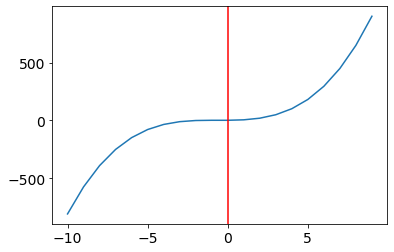

In [13]:
# create a graph that passess the v line test
x = np.arange(-10, 10)
y = x**3 + 2*x**2 + x + 1
plt.plot(x, y)
plt.axvline(x=0, color='r');

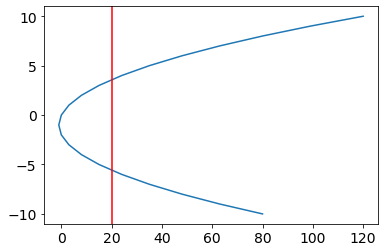

In [22]:
# create a graph that does not pass v line test
y = np.arange(-10, 11)
x = y**2 + 2*y
plt.plot(x, y)
plt.axvline(x=20, color='r');

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

In [23]:
# function cannot output the same value for the same input
# [citation: from the solution notebook comments below]:
# x value / domain value mapped to multiple outputs y value / co-domain value

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [24]:
# I believe Relation 2 is the only one that is a function 
# because given the input x, it spits out the unique output y

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [25]:
# dimension of function m
m = np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]])
m.shape
# dim of domain = 3
# dim of co-domain = 3

(3, 3)

In [ ]:
# dimension of function n
# dim of domain = 4
# dim of co-domain = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes it is possible
e.g.
\begin{align}
m(𝑥_1,𝑥_2,)=(x_1+x_2, x_1*x_2, x_1+2*x_2)
\end{align}

Here, we have 2 dimensions of domain but spits out 3 dimension of co-domain

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [39]:
# write a function
def p(v):
    x1 = v[0][0]
    x2 = v[1][0]
    row1 = np.array([x1 + 3*x2])
    row2 = np.array([2*x2 - x1])
    output_vec = np.array([row1, row2])
    return output_vec


In [45]:
def q(v):
    x1 = v[0][0]
    x2 = v[1][0]
    x3= v[2][0]
    row1 = np.array([4*x1 + x2 + 2*x3])
    row2 = np.array([2*x2 - x1 + 3*x3])
    row3 = np.array([5*x1 - 2*x3 + x2])
    output_vec = np.array([row1, row2, row3])
    return output_vec

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [40]:
# for p(v)
def f_p(x1, x2):
    return np.array([[x1 + 3*x2], [2*x2 - x1]])
print(f_p(1,1))
x_input = np.array([[1], [1]])
p(x_input)

[[4]
 [1]]


array([[4],
       [1]])

In [46]:
# for q(v)
def f_q(x1, x2, x3):
    return np.array([[4*x1 + x2 + 2*x3], [2*x2 - x1 + 3*x3], [5*x1 - 2*x3 + x2]])
print(f_q(1, 1, 1))
x_input = np.array([[1], [1], [1]])
q(x_input)

[[7]
 [4]
 [4]]


array([[7],
       [4],
       [4]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Anser for 5.1:
- eigenvalues
    - factor of scale
    - **from the lecture**: scalar that represents how its corresponding eigenvectors was scaled during the transformation
- eigenvectors
    - a vector does not change direction in linear transformation
    - **from the lecture**: any vector that does not change its orientation during a given transformation

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Answer for 6.1:
- Hard to visualize
- not so intuitive
- hard to interpret
- difficult to explore the data

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Answer for 6.2:
- P: number of parameters that we are including in the model
- N: number of observations
$$
P \geq N
$$

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [47]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


CONTROL  AGE1 METRO3 REGION   LMED   FMR    L30    L50    L80  \
0  '100003130103'    82    '3'    '1'  73738   956  15738  26213  40322   
1  '100006110249'    50    '5'    '3'  55846  1100  17165  28604  45744   
2  '100006370140'    53    '5'    '3'  55846  1100  13750  22897  36614   
3  '100006520140'    67    '5'    '3'  55846   949  13750  22897  36614   
4  '100007130148'    26    '1'    '3'  60991   737  14801  24628  39421   

    IPOV  ...      FMTINCRELFMRCAT  FMTCOST06RELAMICAT FMTCOST08RELAMICAT  \
0  11067  ...      '1 LTE 50% FMR'    '2 30 - 50% AMI'   '2 30 - 50% AMI'   
1  24218  ...           '3 GT FMR'    '4 60 - 80% AMI'   '4 60 - 80% AMI'   
2  15470  ...  '2 50.1 - 100% FMR'    '4 60 - 80% AMI'  '5 80 - 100% AMI'   
3  13964  ...  '2 50.1 - 100% FMR'  '6 100 - 120% AMI'     '7 120% AMI +'   
4  15492  ...           '3 GT FMR'    '3 50 - 60% AMI'   '3 50 - 60% AMI'   

   FMTCOST12RELAMICAT  FMTCOSTMEDRELAMICAT   FMTINCRELAMICAT  \
0    '2 30 - 50% AMI'     '2 30 - 50% AMI'  '2 30 - 50% AMI'   
1  '6 100 - 120% AMI'     '4 60 - 80% AMI'    '7 120% AMI +'   
2  '6 100 - 120% AMI'     '4 60 - 80% AMI'  '4 60 - 80% AMI'   
3      '7 120% AMI +'    '5 80 - 100% AMI'  '4 60 - 80% AMI'   
4    '3 50 - 60% AMI'     '3 50 - 60% AMI'    '7 120% AMI +'   

        FMTASSISTED          FMTBURDEN  FMTREGION  FMTSTATUS  
0               '.'     '2 30% to 50%'       '-5'       '-5'  
1               '.'  '1 Less than 30%'       '-5'       '-5'  
2               '.'    '3 50% or More'       '-5'       '-5'  
3               '.'  '1 Less than 30%'       '-5'       '-5'  
4  '0 Not Assisted'  '1 Less than 30%'       '-5'       '-5'  

[5 rows x 99 columns]

In [48]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [49]:
# check for null values
national.isnull().sum().any()

False

In [50]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [51]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [52]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


CONTROL  AGE1  METRO3  REGION   LMED   FMR    L30    L50    L80   IPOV  \
0        0    82       2       0  73738   956  15738  26213  40322  11067   
1        1    50       4       2  55846  1100  17165  28604  45744  24218   
2        2    53       4       2  55846  1100  13750  22897  36614  15470   
3        3    67       4       2  55846   949  13750  22897  36614  13964   
4        4    26       0       2  60991   737  14801  24628  39421  15492   

   ...  FMTINCRELFMRCAT  FMTCOST06RELAMICAT  FMTCOST08RELAMICAT  \
0  ...                1                   1                   1   
1  ...                3                   3                   3   
2  ...                2                   3                   4   
3  ...                2                   5                   6   
4  ...                3                   2                   2   

   FMTCOST12RELAMICAT  FMTCOSTMEDRELAMICAT  FMTINCRELAMICAT  FMTASSISTED  \
0                   1                    1                2            0   
1                   5                    3                7            0   
2                   5                    3                4            0   
3                   6                    4                4            0   
4                   2                    2                7            1   

   FMTBURDEN  FMTREGION  FMTSTATUS  
0          2          0          0  
1          1          0          0  
2          3          0          0  
3          1          0          0  
4          1          0          0  

[5 rows x 99 columns]

In [53]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [59]:
### Your Code Here
# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
myscalar = StandardScaler()

In [60]:
# Standardize the dataset (default in normalization)
national_processed = myscalar.fit_transform(national_processed)

In [61]:
# import and instantiate the PCA class
from sklearn.decomposition import PCA
my_pca = PCA(n_components=10)

In [62]:
# Apply PCA to the data
pca_features = my_pca.fit_transform(national_processed)

In [58]:
pca_features[0]

array([-2.57657021, -1.37612683, -1.25383461, -0.61988018,  1.59275912,
       -2.529801  , -1.02475624,  2.03857341,  0.74375796, -0.98627402])

In [63]:
# how much variation did each principal component explain?
my_pca.explained_variance_ratio_


array([0.34050542, 0.14442164, 0.10287616, 0.07245401, 0.05166581,
       0.04006691, 0.02785863, 0.02220382, 0.02016904, 0.01769653])

In [65]:
# how much total variance did we explain?
sum(my_pca.explained_variance_ratio_)

0.8399179752843201

In [66]:
# how much information did we lose?
1 - sum(my_pca.explained_variance_ratio_)

0.1600820247156799

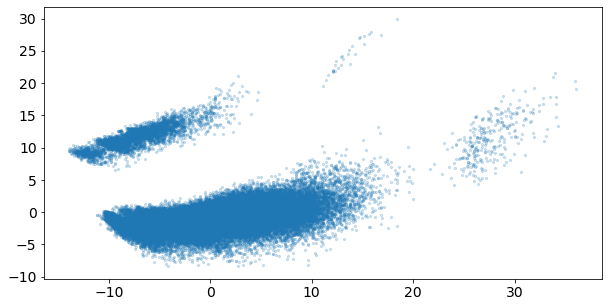

In [73]:
plt.figure(figsize=(10, 5))
plt.scatter(pca_features[:,0], pca_features[:,1], s=5, alpha=.2);


# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)